![alt text](https://trello-attachments.s3.amazonaws.com/56b4dc9a5618cc0446578ec6/5c6ffc4673fc7e8ac0a66708/c5f7d8d143f69ffd6683d6ad5b72c58f/Machine-Learning-e-Ciência-de-dados-nas-apostas-esportivas.png)

## Importando bibliotecas

In [32]:
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]

## Fazendo loop nos arquivos da pasta

In [33]:
file_list = [f for f in glob.glob("data/*.csv")]

In [34]:
df = pd.read_csv(file_list[21])
display(df.shape)
df.head()

(70, 107)

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,league
0,0,I2,23/08/2019,20:00,Pisa,Benevento,0,0,D,0,...,0.25,1.77,2.10,1.79,2.12,1.86,2.13,1.80,2.05,Italy - Serie B
1,1,I2,24/08/2019,17:00,Crotone,Cosenza,0,0,D,0,...,-0.50,2.05,1.80,2.07,1.83,2.11,1.85,2.05,1.80,Italy - Serie B
2,2,I2,24/08/2019,17:00,Salernitana,Pescara,3,1,H,1,...,-0.25,2.05,1.80,2.06,1.84,2.11,1.88,2.04,1.82,Italy - Serie B
3,3,I2,24/08/2019,20:00,Ascoli,Trapani,3,1,H,1,...,-0.50,1.83,2.02,1.90,2.00,1.95,2.07,1.84,2.00,Italy - Serie B
4,4,I2,24/08/2019,20:00,Cittadella,Spezia,0,3,A,0,...,-0.25,2.10,1.77,2.12,1.79,2.17,1.83,2.08,1.78,Italy - Serie B


In [35]:
df_list = [pd.read_csv(f) for f in file_list]

In [36]:
df_list[0].columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'league'],
      dtype='object')

## Gerando dataset final

In [6]:
for i in range(len(df_list)):
    if 'Home' in list(df_list[i].columns):
        df_list[i] = df_list[i].rename(columns={'Home': 'HomeTeam', 'Away': 'AwayTeam', 'Res': 'FTR', 
                                                'AvgH': 'B365H', 'AvgD': 'B365D', 'AvgA': 'B365A'})

In [7]:
columns = ['HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 'league']
new_df_list = []
for i in range(len(df_list)):
    new_df_list.append(df_list[i][columns])

In [8]:
final_dataset = pd.concat(new_df_list, sort=False).reset_index(drop=True)
final_dataset.shape

(137026, 7)

In [9]:
display(final_dataset.head())
display(final_dataset.tail())

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,league
0,Heerenveen,Roda JC,D,1.5,4.2,6.50,Netherlands - Eredivisie
1,Heracles,AZ Alkmaar,H,7.5,4.2,1.44,Netherlands - Eredivisie
2,Sparta,Twente,A,5.5,3.8,1.62,Netherlands - Eredivisie
3,Waalwijk,Utrecht,A,3.0,3.4,2.30,Netherlands - Eredivisie
4,Willem II,Vitesse,H,2.9,3.3,2.40,Netherlands - Eredivisie


,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,league
137021,Mallorca,Valladolid,H,1.50,4.33,6.0,Spain - La Liga Primera Division
137022,Real Madrid,Osasuna,H,1.25,6.00,10.0,Spain - La Liga Primera Division
137023,Sevilla,Valencia,H,3.30,3.50,2.1,Spain - La Liga Primera Division
137024,Vallecano,Ath Bilbao,D,2.05,3.60,3.4,Spain - La Liga Primera Division
137025,Zaragoza,Ath Madrid,A,2.20,3.50,3.1,Spain - La Liga Primera Division


In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137026 entries, 0 to 137025
Data columns (total 7 columns):
HomeTeam    136906 non-null object
AwayTeam    136906 non-null object
FTR         136902 non-null object
B365H       136663 non-null float64
B365D       136663 non-null float64
B365A       136663 non-null float64
league      137026 non-null object
dtypes: float64(3), object(4)
memory usage: 7.3+ MB


In [11]:
final_dataset.dropna(inplace=True)
final_dataset.shape

(136660, 7)

In [12]:
final_dataset = final_dataset.reset_index(drop=True)

In [13]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136660 entries, 0 to 136659
Data columns (total 7 columns):
HomeTeam    136660 non-null object
AwayTeam    136660 non-null object
FTR         136660 non-null object
B365H       136660 non-null float64
B365D       136660 non-null float64
B365A       136660 non-null float64
league      136660 non-null object
dtypes: float64(3), object(4)
memory usage: 7.3+ MB


## Evolução de Banca

In [14]:
def resultado_aposta(df):
    if df['FTR'] == 'H':
        return 'ganha'
    else:
        return 'perdida'

In [15]:
bet_dataset = final_dataset[(final_dataset['B365H'] <= 1.25)].reset_index(drop=True)

In [16]:
bet_dataset.drop(['B365D', 'B365A',], axis=1, inplace=True)
bet_dataset['resultado_aposta'] = bet_dataset.apply(resultado_aposta, axis=1)

In [18]:
bet_dataset

,HomeTeam,AwayTeam,FTR,B365H,league,resultado_aposta
0,PSV Eindhoven,VVV Venlo,D,1.17,Netherlands - Eredivisie,perdida
1,AZ Alkmaar,Sparta,H,1.25,Netherlands - Eredivisie,ganha
2,Ajax,Waalwijk,H,1.17,Netherlands - Eredivisie,ganha
3,Ajax,Sparta,D,1.17,Netherlands - Eredivisie,perdida
4,Twente,Waalwijk,H,1.20,Netherlands - Eredivisie,ganha
...,...,...,...,...,...,...
4033,Barcelona,Betis,H,1.20,Spain - La Liga Primera Division,ganha
4034,Real Madrid,Malaga,H,1.20,Spain - La Liga Primera Division,ganha
4035,Valencia,Granada,H,1.25,Spain - La Liga Primera Division,ganha
4036,Barcelona,Malaga,H,1.25,Spain - La Liga Primera Division,ganha


In [19]:
banca = 1000
bet_dataset['banca_atualizada'] = ''
for key, row in bet_dataset.iterrows():
    stake = banca * 0.01
    if row['FTR'] == 'H':
        banca += stake * (row['B365H'] - 1)
        bet_dataset.loc[key, 'banca_atualizada'] = round(banca,2)
    else:
        banca -= stake
        bet_dataset.loc[key, 'banca_atualizada'] = round(banca,2)

In [20]:
bet_dataset.head()

,HomeTeam,AwayTeam,FTR,B365H,league,resultado_aposta,banca_atualizada
0,PSV Eindhoven,VVV Venlo,D,1.17,Netherlands - Eredivisie,perdida,990
1,AZ Alkmaar,Sparta,H,1.25,Netherlands - Eredivisie,ganha,992.48
2,Ajax,Waalwijk,H,1.17,Netherlands - Eredivisie,ganha,994.16
3,Ajax,Sparta,D,1.17,Netherlands - Eredivisie,perdida,984.22
4,Twente,Waalwijk,H,1.20,Netherlands - Eredivisie,ganha,986.19


In [21]:
bet_dataset_plot = bet_dataset

In [22]:
bet_dataset_plot

,HomeTeam,AwayTeam,FTR,B365H,league,resultado_aposta,banca_atualizada
0,PSV Eindhoven,VVV Venlo,D,1.17,Netherlands - Eredivisie,perdida,990
1,AZ Alkmaar,Sparta,H,1.25,Netherlands - Eredivisie,ganha,992.48
2,Ajax,Waalwijk,H,1.17,Netherlands - Eredivisie,ganha,994.16
3,Ajax,Sparta,D,1.17,Netherlands - Eredivisie,perdida,984.22
4,Twente,Waalwijk,H,1.20,Netherlands - Eredivisie,ganha,986.19
...,...,...,...,...,...,...,...
4033,Barcelona,Betis,H,1.20,Spain - La Liga Primera Division,ganha,663.18
4034,Real Madrid,Malaga,H,1.20,Spain - La Liga Primera Division,ganha,664.51
4035,Valencia,Granada,H,1.25,Spain - La Liga Primera Division,ganha,666.17
4036,Barcelona,Malaga,H,1.25,Spain - La Liga Primera Division,ganha,667.83


In [23]:
bet_dataset_plot['banca_atualizada'] = bet_dataset_plot['banca_atualizada'].astype(float)

## Plotando a evolução da banca usando matplotlib

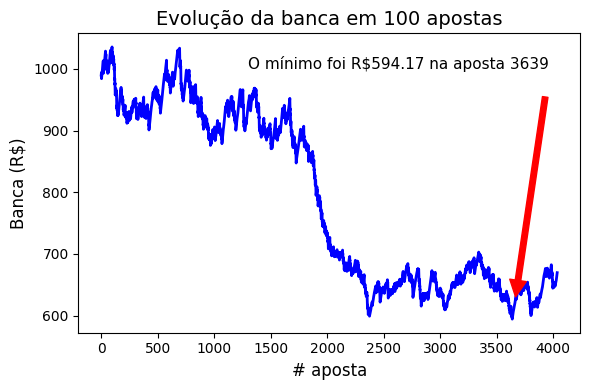

In [24]:
y = bet_dataset_plot['banca_atualizada'].values.min()
x = np.where(bet_dataset_plot['banca_atualizada'].values == y)[0][0]
plt.plot(bet_dataset_plot['banca_atualizada'].values, color='blue', linewidth=2.0)
plt.ylabel('Banca (R$)', fontsize=12, color='black')
plt.xlabel('# aposta', fontsize=12, color='black')
plt.title('Evolução da banca em 100 apostas', fontsize=14, color='black')
plt.annotate(f'O mínimo foi R${y} na aposta {x}', xy=(x, y), xytext=(1300, 1000),
            arrowprops={'color':'red','facecolor':'red', 'shrink':0.09},fontsize=11)
plt.tight_layout()
plt.savefig('banca_evol.png')
plt.show()

## Plotando a evolução da banca com seaborn

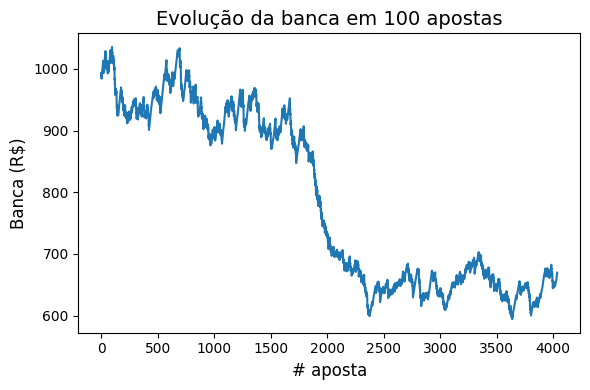

In [25]:
ax = sns.lineplot(data=bet_dataset_plot['banca_atualizada'],)
ax.set_title('Evolução da banca em 100 apostas', fontsize=14, color='black')
ax.set_xlabel('# aposta', fontsize=12, color='black')
ax.set_ylabel('Banca (R$)', fontsize=12, color='black')
plt.tight_layout()
# plt.savefig('bar_odd_mean_pandas.png')
plt.show()

## Alterando o estilo do gráfico

In [26]:
plt.style.available

['seaborn-pastel',
 'Solarize_Light2',
 'classic',
 'seaborn-bright',
 'dark_background',
 'seaborn-dark',
 'tableau-colorblind10',
 'grayscale',
 'seaborn-deep',
 'seaborn-colorblind',
 '_classic_test',
 'seaborn-muted',
 'seaborn-paper',
 'seaborn-poster',
 'fast',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'ggplot',
 'fivethirtyeight',
 'bmh',
 'seaborn-whitegrid',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn']

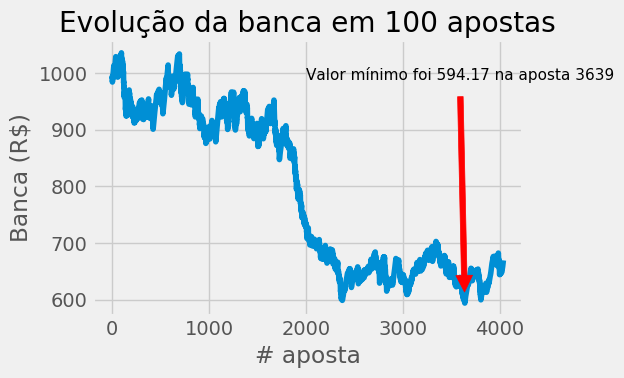

In [29]:
plt.style.use('fivethirtyeight')
y = bet_dataset_plot['banca_atualizada'].values.min()
x = np.where(bet_dataset_plot['banca_atualizada'].values == y)[0][0]
plt.plot(bet_dataset_plot['banca_atualizada'].values)
plt.ylabel('Banca (R$)')
plt.xlabel('# aposta')
plt.title('Evolução da banca em 100 apostas')
plt.annotate(f'Valor mínimo foi {y} na aposta {x}', xy=(x, y), xytext=(2000, 988),
            arrowprops={'color':'red','facecolor':'red', 'shrink':0.05},fontsize=11)
plt.tight_layout()
# plt.savefig('bar_odd_mean_pandas.png')
plt.show()


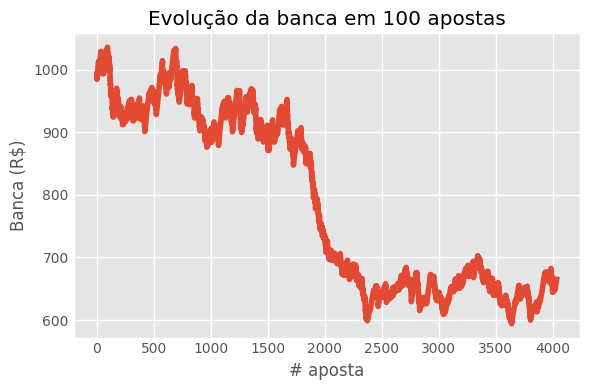

In [28]:
plt.style.use('ggplot')
ax = sns.lineplot(data=bet_dataset_plot['banca_atualizada'])
# ax.set(xlabel='# aposta', ylabel='Banca (R$)', title='Evolução da banca em 100 apostas')
ax.set_title('Evolução da banca em 100 apostas')
ax.set_xlabel('# aposta')
ax.set_ylabel('Banca (R$)')
plt.tight_layout()
# plt.savefig('bar_odd_mean_pandas.png')
plt.show()